<h1> This project discusses beginner level text classification using a Alexa product reviews dataset off Kaggle. </h1>
<h2> The dataset contains 3000 reviews of Alexa products. </h2>
<p> The notebook deals with basic text classification tasks including the preprocessing of text data, vectorization of text data, and the application of machine learning algorithms to classify the reviews into positive and negative categories using Logistical Regression which is the stepping stone towards more deeper and intricate models. </p>
<p> We will also use NLP libraries like NLTK to preprocess the text data and vectorize it. </p>

<h3> Step 1: Tech Stack setup and installing dependencies </h3>
<p> The first step is to download the nltk library and install the dependencies required for the project. The nltk library is a powerful library for natural language processing and text classification tasks. A short description of the libraries is given below: </p>
<ul>
    <li> nltk: The Natural Language Toolkit is a powerful library for text processing and classification tasks. </li>
        <ul>
            <li> punkt: The punkt module is used for tokenization of text data. </li>
            <li> stopwords: The stopwords module is used for removing stopwords from text data. </li>
            <li> wordnet: The wordnet module is used for lemmatization of text data. </li>
            <li> omw-1.4: The omw-1.4 module is used for wordnet synsets. </li>
        </ul>
    <li> numpy: The numpy library is a powerful library for numerical computing and array manipulation. </li>
    <li> pandas: The pandas library is a powerful library for data manipulation and analysis. </li>
    <li> scikit-learn: The scikit-learn library is a powerful library for machine learning and data analysis. </li>
    <li> matplotlib: The matplotlib library is a powerful library for data visualization and plotting. </li>
</ul>

In [1]:
# install dependencies if they do not exist using the requirements.txt file and pip
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Archit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Archit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Archit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Archit\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

<h3> Step 3: Loading the Dataset and Exploratory Analysis </h3>
<p> The dataset can be downloaded from Kaggle, but for convinience it is also included in the repository as a tsv file.
Link to dataset - https://www.kaggle.com/datasets/sid321axn/amazon-alexa-reviews/data</p>

The cell below will load the dataset and help us check the first few rows.

In [4]:
import pandas as pd
# load the dataset as a pandas DataFrame 
reviews = pd.read_csv('amazon_alexa.tsv', delimiter='\t')
# display the first few rows of the dataset
reviews.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


Using the matplotlib library to plot the distribution of the ratings in the dataset for exploratory analysis.

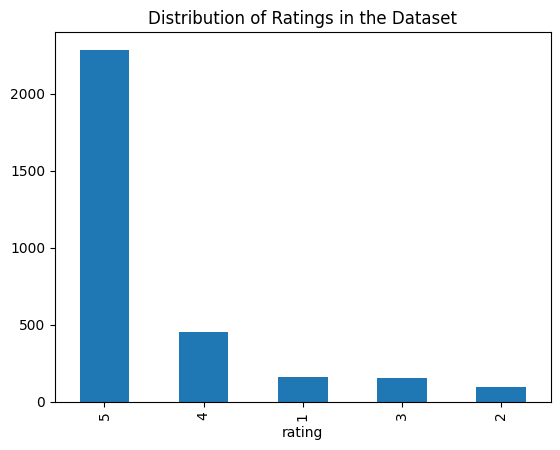

In [15]:
plot = reviews['rating'].value_counts().plot(kind='bar', title='Distribution of Ratings in the Dataset')

Displaying distribution of target variable 'feedback' in the dataset. The feedback column contains the sentiment of the review. As you can notice the data is unbalanced. We will split the data into training and test split later on while keeping this in mind.

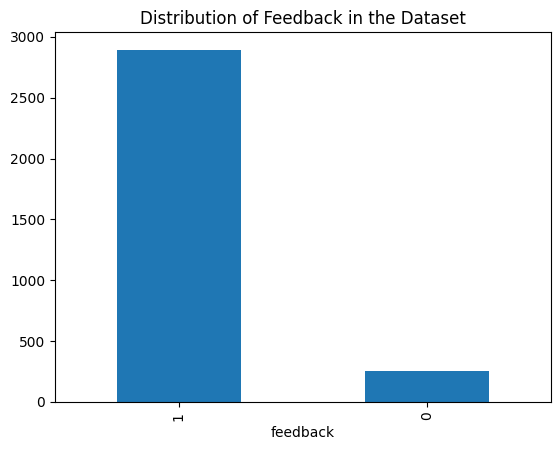

In [5]:
feedback_plot = reviews['feedback'].value_counts().plot(kind='bar', title='Distribution of Feedback in the Dataset')

<h3> Step 4: Preprocessing the Text Data </h3>
<p> The text data needs to be preprocessed before it can be used for classification tasks. The preprocessing steps include tokenization, removing stopwords, and lemmatization. </p>
<p> The following steps are performed: </p>
<ol>
    <li> Data Cleaning: Removing NaN values and duplicates from the dataset. </li>
    <li> Tokenization: The text data is tokenized into words. </li>
    <li> Removing Stopwords: The stopwords are removed from the text data. </li>
    <li> Lemmatization: The words are lemmatized to their root form. </li>

In [27]:
# Remove NaN values and duplicates from the dataset
reviews.dropna(inplace=True)
reviews.drop_duplicates(inplace=True)

<h3> Step 5: Splitting the Dataset into Training and Test Sets </h3>
<p> The dataset is split into training and test sets for training and evaluating the machine learning model. </p>

In [28]:
from sklearn.model_selection import train_test_split

# split the dataset into training and test sets with equal distribution of the target variable
X_train, X_test, y_train, y_test = train_test_split(reviews['verified_reviews'], reviews['feedback'], test_size=0.2, random_state=0, stratify=reviews['feedback'])

# display the shape of the training and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1928,), (482,), (1928,), (482,))

<h3> Step 7: Building the pipeline and training the Machine Learning Model </h3>
<p> The machine learning model is built using the Logistical Regression algorithm. The model is trained on the training data and evaluated on the test data. The pipeline allows us to vectorize the text data and train the model in a single step. </p>

In [29]:
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import string
from nltk.tokenize import word_tokenize
# Initialize WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Tokenization, lemmatization, and removing stopwords/punctuations function
def nltk_tokenizer(sentence):
    tokens = word_tokenize(sentence)  # Tokenize the sentence
    tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token not in string.punctuation 
              and token not in stopwords.words('english')]  # Lemmatize tokens and remove stopwords/punctuations
    return tokens

def clean_text(text):
    if pd.isnull(text):
        return ""
    return str(text).strip().lower()

X_train = X_train.apply(clean_text)
X_test = X_test.apply(clean_text)

pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(tokenizer=nltk_tokenizer)),
    ('classifier', LogisticRegression(class_weight='balanced'))
])

# train the model
pipeline.fit(X_train, y_train)

# make predictions on the test data
y_pred = pipeline.predict(X_test)

C:\Users\Archit\miniforge3\lib\site-packages\sklearn\feature_extraction\text.py:523: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<h3> Step 8: Evaluating the Model </h3>
<p> The model is evaluated using accuracy and classification report. The accuracy score is calculated to measure the performance of the model. The classification report provides the precision, recall, and F1-score for each class in the target variable. </p>


In [30]:
from sklearn.metrics import accuracy_score, classification_report

# calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# display the accuracy of the model
print(f'Accuracy: {accuracy}')

# display the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.9128630705394191
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.05      0.09        44
           1       0.91      1.00      0.95       438

    accuracy                           0.91       482
   macro avg       0.96      0.52      0.52       482
weighted avg       0.92      0.91      0.88       482



<h3> Step 9 (optional): Saving the Model </h3>
<p> The model can be saved using the joblib library for future use. The model can be loaded and used for making predictions on new data. </p>

In [31]:
import joblib

# save the model
joblib.dump(pipeline, 'alexa_reviews_model.joblib')

['alexa_reviews_model.joblib']